In [108]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
%matplotlib inline

In [157]:
filepath = "datasets_905_1652_states.csv"
df=pd.read_csv(filepath)
df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Maine,10.10%,8.40%,-1.70%,22000,702000,75240,63896,$342,True,NaN,273160,NaN,315160
1,Maryland,11.30%,6.60%,-4.70%,278000,3700000,135208,100844,$243,True,856297.0,1252304,396007.0,960848
2,Massachusetts,4.40%,2.80%,-1.60%,107000,4232000,207121,157751,$190,True,1296359.0,1684328,387969.0,1252277
3,Michigan,12.40%,6.10%,-6.30%,618000,5876000,313123,275080,$233,True,1912009.0,2300958,388949.0,1947787
4,Minnesota,9.10%,4.50%,-4.60%,250000,3319000,74060,47266,$203,True,873040.0,1051509,178469.0,944222


In [110]:
# Cleaning the data
df.drop(df[df['State'] =="United States"].index, inplace = True) 

In [112]:
df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Maine,10.10%,8.40%,-1.70%,22000,702000,75240,63896,$342,True,NaN,273160,NaN,315160
1,Maryland,11.30%,6.60%,-4.70%,278000,3700000,135208,100844,$243,True,856297.0,1252304,396007.0,960848
2,Massachusetts,4.40%,2.80%,-1.60%,107000,4232000,207121,157751,$190,True,1296359.0,1684328,387969.0,1252277
3,Michigan,12.40%,6.10%,-6.30%,618000,5876000,313123,275080,$233,True,1912009.0,2300958,388949.0,1947787
4,Minnesota,9.10%,4.50%,-4.60%,250000,3319000,74060,47266,$203,True,873040.0,1051509,178469.0,944222


In [113]:
df.dtypes

State                                            object
Uninsured Rate (2010)                            object
Uninsured Rate (2015)                            object
Uninsured Rate Change (2010-2015)                object
Health Insurance Coverage Change (2010-2015)      int64
Employer Health Insurance Coverage (2015)         int64
Marketplace Health Insurance Coverage (2016)      int64
Marketplace Tax Credits (2016)                    int64
Average Monthly Tax Credit (2016)                object
State Medicaid Expansion (2016)                  object
Medicaid Enrollment (2013)                      float64
Medicaid Enrollment (2016)                        int64
Medicaid Enrollment Change (2013-2016)          float64
Medicare Enrollment (2016)                        int64
dtype: object

In [114]:
df.count()

State                                           51
Uninsured Rate (2010)                           51
Uninsured Rate (2015)                           51
Uninsured Rate Change (2010-2015)               51
Health Insurance Coverage Change (2010-2015)    51
Employer Health Insurance Coverage (2015)       51
Marketplace Health Insurance Coverage (2016)    51
Marketplace Tax Credits (2016)                  51
Average Monthly Tax Credit (2016)               51
State Medicaid Expansion (2016)                 51
Medicaid Enrollment (2013)                      49
Medicaid Enrollment (2016)                      51
Medicaid Enrollment Change (2013-2016)          49
Medicare Enrollment (2016)                      51
dtype: int64

In [115]:
#Convert percentages from object to float
df['Uninsured Rate Change (2010-2015)'] = df['Uninsured Rate Change (2010-2015)'].str.strip()
df['Uninsured Rate Change (2010-2015)'] = df['Uninsured Rate Change (2010-2015)'].str.strip("%").astype(float)

In [116]:
# Convert dollars from object to int
str_dol_to_int = lambda x: int(x.strip('$'))
df['Average Monthly Tax Credit (2016)'] = df['Average Monthly Tax Credit (2016)'].map(str_dol_to_int)

In [117]:
#Convert bool to int.
df.drop([50], inplace=True) # getting rid of total US info ... (maybe stupid)
df['State Medicaid Expansion (2016)'] = df['State Medicaid Expansion (2016)'].map(lambda x: int(x))

In [118]:
df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Maine,10.10%,8.40%,-1.7,22000,702000,75240,63896,342,1,NaN,273160,NaN,315160
1,Maryland,11.30%,6.60%,-4.7,278000,3700000,135208,100844,243,1,856297.0,1252304,396007.0,960848
2,Massachusetts,4.40%,2.80%,-1.6,107000,4232000,207121,157751,190,1,1296359.0,1684328,387969.0,1252277
3,Michigan,12.40%,6.10%,-6.3,618000,5876000,313123,275080,233,1,1912009.0,2300958,388949.0,1947787
4,Minnesota,9.10%,4.50%,-4.6,250000,3319000,74060,47266,203,1,873040.0,1051509,178469.0,944222


In [119]:
df = df.dropna(how='any',axis=0)

In [120]:
df.isnull().sum()

State                                           0
Uninsured Rate (2010)                           0
Uninsured Rate (2015)                           0
Uninsured Rate Change (2010-2015)               0
Health Insurance Coverage Change (2010-2015)    0
Employer Health Insurance Coverage (2015)       0
Marketplace Health Insurance Coverage (2016)    0
Marketplace Tax Credits (2016)                  0
Average Monthly Tax Credit (2016)               0
State Medicaid Expansion (2016)                 0
Medicaid Enrollment (2013)                      0
Medicaid Enrollment (2016)                      0
Medicaid Enrollment Change (2013-2016)          0
Medicare Enrollment (2016)                      0
dtype: int64

In [121]:
# Finding correlation
percent_to_convert = ['Uninsured Rate (2010)', 'Uninsured Rate (2015)', 'Uninsured Rate Change (2010-2015)']


In [122]:
# What factors do have effect on uninsured change rate
# Medicaid Enrollment Change (2013-2016)
# Marketplace Health Insurance Coverage (2016)

correlations = df.corr()["Uninsured Rate Change (2010-2015)"].sort_values()
correlations

Health Insurance Coverage Change (2010-2015)   -0.446210
Medicaid Enrollment Change (2013-2016)         -0.441610
Medicaid Enrollment (2016)                     -0.332004
Marketplace Health Insurance Coverage (2016)   -0.295910
Marketplace Tax Credits (2016)                 -0.295015
Medicare Enrollment (2016)                     -0.291340
Medicaid Enrollment (2013)                     -0.267465
Employer Health Insurance Coverage (2015)      -0.258086
Average Monthly Tax Credit (2016)               0.030673
State Medicaid Expansion (2016)                 0.193900
Uninsured Rate Change (2010-2015)               1.000000
Name: Uninsured Rate Change (2010-2015), dtype: float64

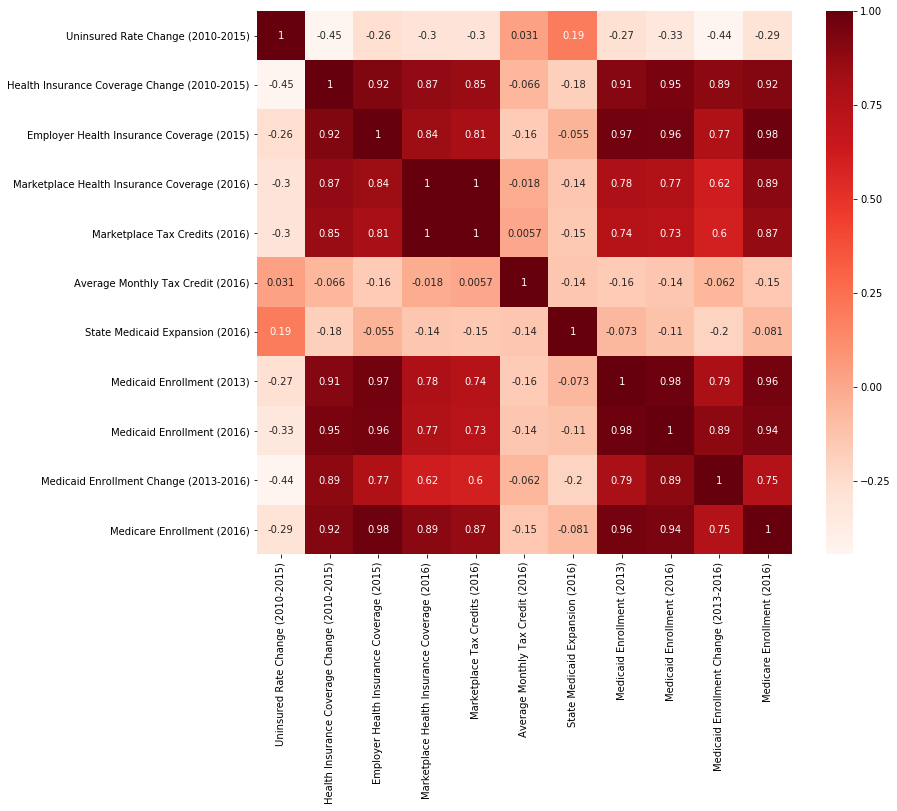

In [123]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [124]:
# What factors do have effect on Medicaid Enrollment Change (2013-2016) change rate
# Health Insurance Coverage Change (2010-2015)
# Employer Health Insurance Coverage (2015) 
# Marketplace Health Insurance Coverage (2016)
# Marketplace Tax Credits (2016) 

correlations = df.corr()["Medicaid Enrollment Change (2013-2016)"].sort_values()
correlations

Uninsured Rate Change (2010-2015)              -0.441610
State Medicaid Expansion (2016)                -0.198294
Average Monthly Tax Credit (2016)              -0.062249
Marketplace Tax Credits (2016)                  0.600366
Marketplace Health Insurance Coverage (2016)    0.620638
Medicare Enrollment (2016)                      0.748000
Employer Health Insurance Coverage (2015)       0.772999
Medicaid Enrollment (2013)                      0.791952
Health Insurance Coverage Change (2010-2015)    0.889060
Medicaid Enrollment (2016)                      0.890577
Medicaid Enrollment Change (2013-2016)          1.000000
Name: Medicaid Enrollment Change (2013-2016), dtype: float64

In [125]:
plt.clf()
X = df[['State Medicaid Expansion (2016)','Uninsured Rate Change (2010-2015)','Average Monthly Tax Credit (2016)','Marketplace Tax Credits (2016)','Health Insurance Coverage Change (2010-2015)', 'Medicaid Enrollment Change (2013-2016)','Employer Health Insurance Coverage (2015)','Medicare Enrollment (2016)']]
X.corr()["Uninsured Rate Change (2010-2015)"].sort_values()


Health Insurance Coverage Change (2010-2015)   -0.446210
Medicaid Enrollment Change (2013-2016)         -0.441610
Marketplace Tax Credits (2016)                 -0.295015
Medicare Enrollment (2016)                     -0.291340
Employer Health Insurance Coverage (2015)      -0.258086
Average Monthly Tax Credit (2016)               0.030673
State Medicaid Expansion (2016)                 0.193900
Uninsured Rate Change (2010-2015)               1.000000
Name: Uninsured Rate Change (2010-2015), dtype: float64

<Figure size 432x288 with 0 Axes>

In [127]:
# Finding states which lowest and highest Uninsured Rate Change (2010-2015)
X.groupby('State Medicaid Expansion (2016)').mean().round(decimals=2)

,Uninsured Rate Change (2010-2015),Average Monthly Tax Credit (2016),Marketplace Tax Credits (2016),Health Insurance Coverage Change (2010-2015),Medicaid Enrollment Change (2013-2016),Employer Health Insurance Coverage (2015),Medicare Enrollment (2016)
State Medicaid Expansion (2016),,,,,,,
0,-6.09,304.41,247241.59,553117.65,487347.18,3756000.00,1254539.00
1,-5.25,279.48,157130.35,315645.16,242333.35,3332096.77,1057750.39


In [128]:
X = df[['Health Insurance Coverage Change (2010-2015)', 'Medicaid Enrollment Change (2013-2016)', 'Uninsured Rate Change (2010-2015)']]
X.head()

,Health Insurance Coverage Change (2010-2015),Medicaid Enrollment Change (2013-2016),Uninsured Rate Change (2010-2015)
1,278000,396007.0,-4.7
2,107000,387969.0,-1.6
3,618000,388949.0,-6.3
4,250000,178469.0,-4.6
5,161000,56640.0,-5.5


In [129]:
X.describe()

,Health Insurance Coverage Change (2010-2015),Medicaid Enrollment Change (2013-2016),Uninsured Rate Change (2010-2015)
count,4.800000e+01,4.800000e+01,48.000000
mean,3.997500e+05,3.291091e+05,-5.550000
std,6.211413e+05,5.971948e+05,2.100051
min,1.500000e+04,-3.935000e+03,-10.300000
25%,9.725000e+04,5.325100e+04,-6.625000
50%,2.245000e+05,1.997850e+05,-5.000000
75%,4.122500e+05,4.160878e+05,-4.075000
max,3.826000e+06,4.087700e+06,-1.600000


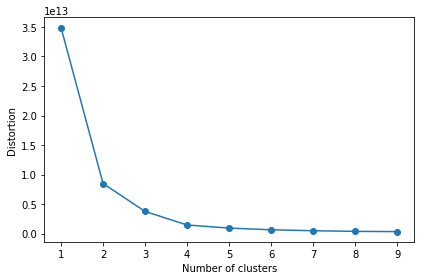

In [130]:
# Finding number of cluster
distortions = []
for i in range(1, 10):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [131]:
data = df[['Uninsured Rate Change (2010-2015)','Health Insurance Coverage Change (2010-2015)','Medicaid Enrollment Change (2013-2016)']]
data.head()

,Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Medicaid Enrollment Change (2013-2016)
1,-4.7,278000,396007.0
2,-1.6,107000,387969.0
3,-6.3,618000,388949.0
4,-4.6,250000,178469.0
5,-5.5,161000,56640.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


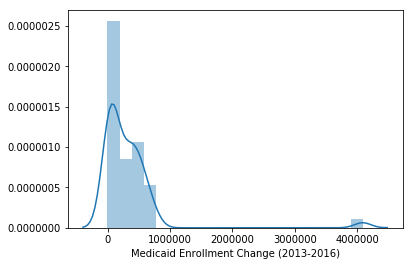

In [132]:
sns.distplot(data["Medicaid Enrollment Change (2013-2016)"])

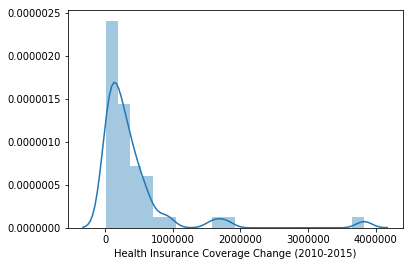

In [133]:
sns.distplot(data["Health Insurance Coverage Change (2010-2015)"])

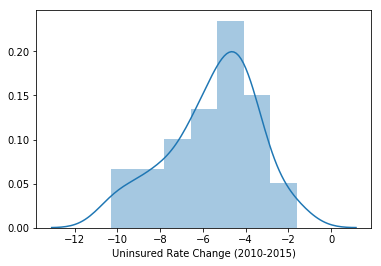

In [134]:
sns.distplot(data['Uninsured Rate Change (2010-2015)'])

In [135]:
mean_cov = data['Health Insurance Coverage Change (2010-2015)'].mean()
std_cov = data['Health Insurance Coverage Change (2010-2015)'].std()

In [136]:
upper_std = mean_cov + (3 * std_cov)
lower_std = mean_cov - (3 * std_cov)

In [137]:
data_rm = data.loc[(data['Health Insurance Coverage Change (2010-2015)']>= lower_std) & (data['Health Insurance Coverage Change (2010-2015)'] <= upper_std)]

In [138]:
data_rm.head()

,Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Medicaid Enrollment Change (2013-2016)
1,-4.7,278000,396007.0
2,-1.6,107000,387969.0
3,-6.3,618000,388949.0
4,-4.6,250000,178469.0
5,-5.5,161000,56640.0


In [139]:
print(len(data))
print(len(data_rm))

48
47


In [140]:
mean_cov = data['Medicaid Enrollment Change (2013-2016)'].mean()
std_cov = data['Medicaid Enrollment Change (2013-2016)'].std()

In [141]:
upper_std = mean_cov + (3 * std_cov)
lower_std = mean_cov - (3 * std_cov)
data_rm = data.loc[(data['Medicaid Enrollment Change (2013-2016)']>= lower_std) & (data['Medicaid Enrollment Change (2013-2016)'] <= upper_std)]

In [142]:
print(len(data))
print(len(data_rm))

48
47


In [143]:


def rate_group (rate):
    global group 
    if rate <-11:
        group = "Decrease than 11 %"
    elif rate <-8:
        group = "Decrease from 8% to 11%"
    elif rate <-5:
        group = "Decrease from 5% to 8%"
    elif rate < -2:
        group = "Decrease from 0 to 2%"
    return group


In [144]:
data_rm['rate_group'] = data_rm['Uninsured Rate Change (2010-2015)'].apply(rate_group)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [145]:
data_rm.head()

,Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Medicaid Enrollment Change (2013-2016),rate_group
1,-4.7,278000,396007.0,Decrease from 0 to 2%
2,-1.6,107000,387969.0,Decrease from 0 to 2%
3,-6.3,618000,388949.0,Decrease from 5% to 8%
4,-4.6,250000,178469.0,Decrease from 0 to 2%
5,-5.5,161000,56640.0,Decrease from 5% to 8%


In [146]:

pd.pivot_table(data = data_rm, index = ['rate_group'], values = ['Health Insurance Coverage Change (2010-2015)','Medicaid Enrollment Change (2013-2016)']).round(decimals=2)

,Health Insurance Coverage Change (2010-2015),Medicaid Enrollment Change (2013-2016)
rate_group,,
Decrease from 0 to 2%,192375.00,159846.67
Decrease from 5% to 8%,517222.22,336213.00
Decrease from 8% to 11%,287000.00,364276.40


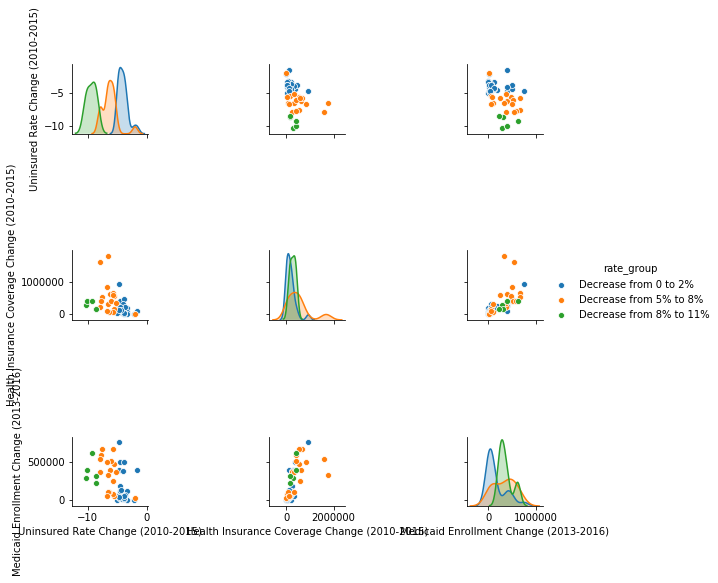

In [147]:
sns.pairplot(data = data_rm, hue = "rate_group")

In [148]:
X= data_rm[['Uninsured Rate Change (2010-2015)','Health Insurance Coverage Change (2010-2015)','Medicaid Enrollment Change (2013-2016)']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [149]:
X.describe()

,Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Medicaid Enrollment Change (2013-2016)
count,47.000000,4.700000e+01,47.00000
mean,-5.457447,3.268511e+05,249139.06383
std,2.021380,3.654782e+05,225281.38675
min,-10.300000,1.500000e+04,-3935.00000
25%,-6.600000,8.750000e+04,53115.00000
50%,-5.000000,2.150000e+05,178469.00000
75%,-4.050000,4.070000e+05,395756.50000
max,-1.600000,1.781000e+06,752748.00000


In [150]:
data_rm['cluster'] = kmeans.labels_
data_rm.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Medicaid Enrollment Change (2013-2016),rate_group,cluster
1,-4.7,278000,396007.0,Decrease from 0 to 2%,2
2,-1.6,107000,387969.0,Decrease from 0 to 2%,1
3,-6.3,618000,388949.0,Decrease from 5% to 8%,2
4,-4.6,250000,178469.0,Decrease from 0 to 2%,1
5,-5.5,161000,56640.0,Decrease from 5% to 8%,1


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


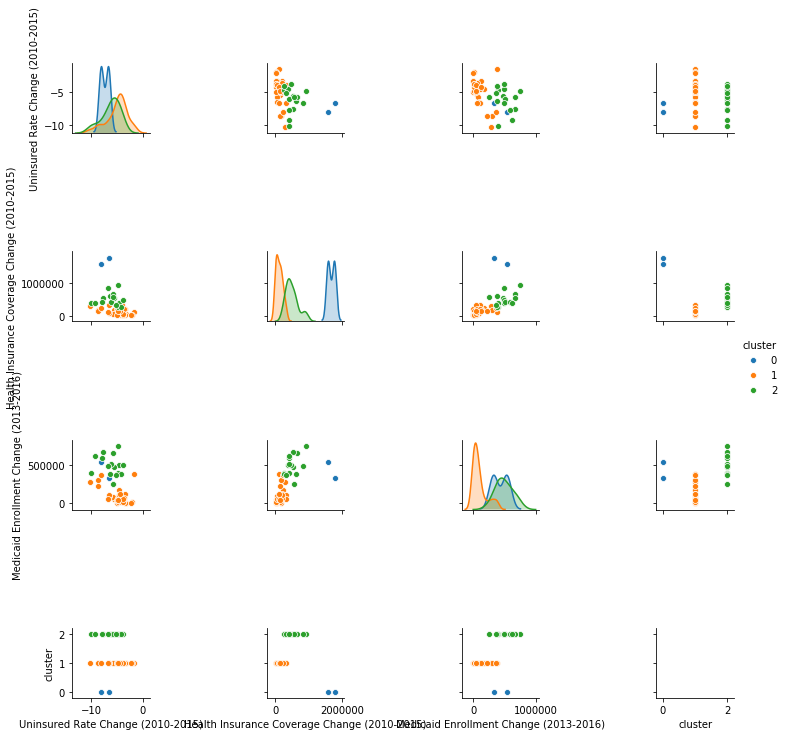

In [151]:
sns.pairplot(data = data_rm, hue = "cluster")

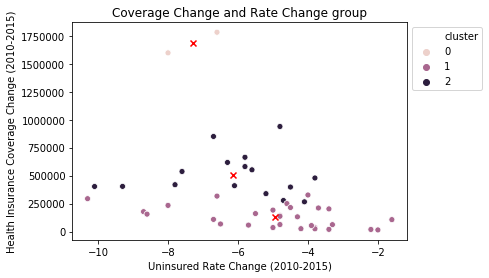

In [152]:

sns.scatterplot(data = data_rm, x = "Uninsured Rate Change (2010-2015)", y = "Health Insurance Coverage Change (2010-2015)", hue = "cluster")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c= "red", marker = "x")

plt.title ("Coverage Change and Rate Change group")

plt.legend(bbox_to_anchor = (1,1), loc=2)

In [153]:
cluster = data_rm.loc[data_rm['cluster'] == 0]
cluster.head()

,Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Medicaid Enrollment Change (2013-2016),rate_group,cluster
24,-6.6,1781000,328624.0,Decrease from 5% to 8%,0
41,-8.0,1597000,539677.0,Decrease from 5% to 8%,0


In [154]:

sorted_clusters = sorted(data_rm['cluster'].unique())


print ("Cluster % Rate Change Ranges\n")
for cluster_num in sorted_clusters:
    small_data = data_rm.loc[data_rm['cluster']==cluster_num]
    min_rate = small_data['Uninsured Rate Change (2010-2015)'].min()
    max_rate = small_data['Uninsured Rate Change (2010-2015)'].max()
    avg_coverage = small_data['Health Insurance Coverage Change (2010-2015)'].mean()
    avg_Enrollment = small_data['Medicaid Enrollment Change (2013-2016)'].mean()
    
    print(f'Cluster {cluster_num}: Decrease from {max_rate}% to {min_rate}%, avg coverage change: {int(avg_coverage)}, avg_Enrollment: {int(avg_Enrollment)}')

Cluster % Rate Change Ranges

Cluster 0: Decrease from -6.6% to -8.0%, avg coverage change: 1689000, avg_Enrollment: 434150
Cluster 1: Decrease from -1.6% to -10.3%, avg coverage change: 132655, avg_Enrollment: 99693
Cluster 2: Decrease from -3.8% to -10.1%, avg coverage change: 508562, avg_Enrollment: 496882


In [155]:
sorted_clusters = sorted(data_rm['cluster'].unique())


print ("Cluster % Rate Change Ranges\n")
for cluster_num in sorted_clusters:
    small_data = data_rm.loc[data_rm['cluster']==cluster_num]
    avg_rate = small_data['Uninsured Rate Change (2010-2015)'].mean()
    avg_coverage = small_data['Health Insurance Coverage Change (2010-2015)'].mean()
    avg_medicaid_enrollment= small_data['Medicaid Enrollment Change (2013-2016)'].mean()
    
    print(f'Cluster {cluster_num}: avg_rate: {int(avg_rate)}, avg coverage change: {int(avg_coverage)}, avg_medicaid_enrollment: {int(avg_medicaid_enrollment)}')

Cluster % Rate Change Ranges

Cluster 0: avg_rate: -7, avg coverage change: 1689000, avg_medicaid_enrollment: 434150
Cluster 1: avg_rate: -4, avg coverage change: 132655, avg_medicaid_enrollment: 99693
Cluster 2: avg_rate: -6, avg coverage change: 508562, avg_medicaid_enrollment: 496882


In [ ]:
# Using OLS
import numpy as np
import statsmodels.api as sm
x = df["Uninsured Rate (2010)"].astype(float)
y=df["Uninsured Rate (2015)"].astype(float)
model = sm.OLS(x,y).fit()
prediction = model.predict(y.astype(float))
#prediction.plot()
plt.show()

In [ ]:
prediction

In [ ]:
print(model.summary())